In [49]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification, fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)


In [50]:

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
    #fetch_california_housing,
]


In [51]:
type(X)

numpy.ndarray

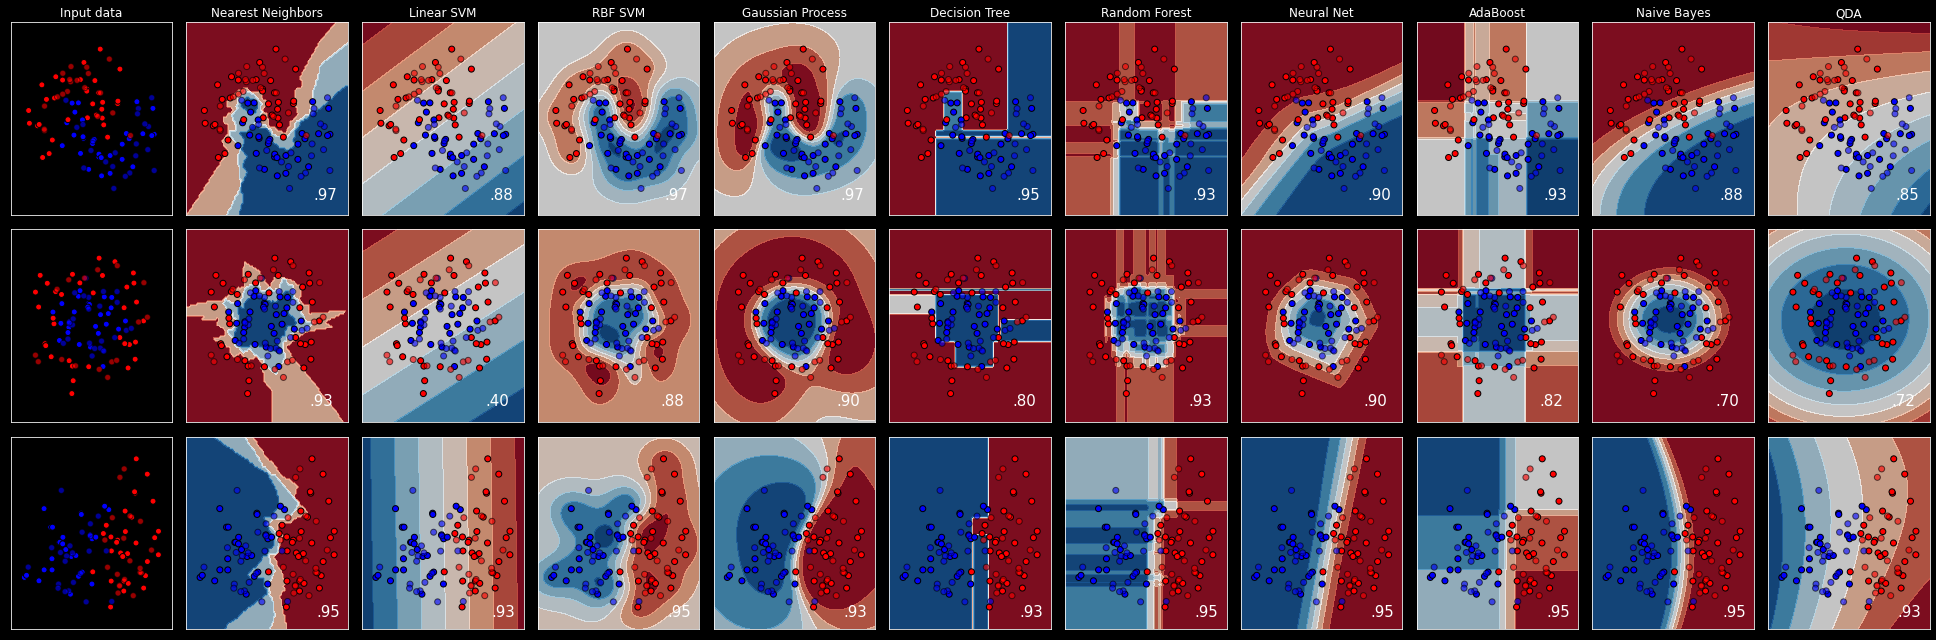

In [52]:

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    # print(ds_cnt)
    # print(X,y)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )



    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1








plt.tight_layout()
plt.show()

In [53]:
def add_missing_values(X_full, y_full):
    n_samples, n_features = X_full.shape

    # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)

    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True

    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    y_missing = y_full.copy()

    return X_missing, y_missing

R2 score: 0.553 ± 0.062


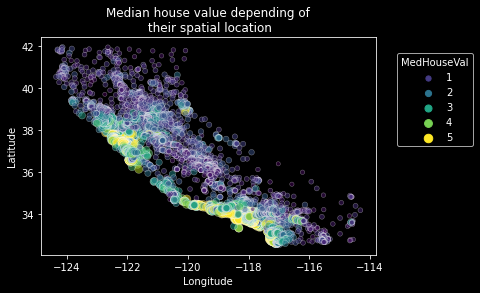

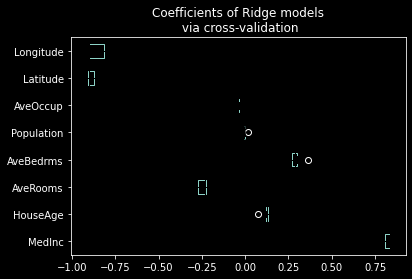

In [54]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

california_housing
california_housing.frame.head()
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, california_housing.data, california_housing.target,
    return_estimator=True, n_jobs=2)
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names
)
coefs
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

In [55]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)
columns_drop = ["Longitude", "Latitude", "AveOccup", "Population","AveRooms","HouseAge"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)

def SC_LabelEncoder(value):
    if value < 1.5:
        return 1
    elif value  < 2.5:
        return 2
    elif value < 3.5:
        return 3
    elif value < 4.5:
        return 4 
    else:
        return 5
    
subset["MedHouseVal"] = subset["MedHouseVal"].apply(SC_LabelEncoder)
X=subset.drop(columns="MedHouseVal")

X=X.to_numpy()

y=subset["MedHouseVal"]

y=y.to_numpy()

In [56]:
y


array([1, 2, 2, 1, 5, 1, 2, 3, 3, 3, 2, 1, 1, 1, 2, 3, 4, 3, 2, 4, 1, 1,
       2, 4, 2, 2, 2, 2, 1, 1, 5, 4, 4, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 2, 2, 3, 1, 3, 2, 3, 1, 5, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 4, 2, 1, 5, 2, 2, 1, 5, 1, 4, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 3, 1, 2, 4, 2, 1, 4, 2, 2, 3, 2, 2, 3, 2, 1, 1, 3,
       2, 1, 2, 5, 2, 3, 1, 2, 2, 1, 2, 1, 3, 3, 2, 4, 1, 3, 3, 2, 1, 2,
       2, 2, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 5, 1, 2, 5, 4, 1, 1,
       1, 3, 2, 1, 1, 2, 3, 2, 4, 1, 1, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2,
       1, 2, 4, 2, 1, 4, 4, 1, 1, 2, 1, 3, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2,
       5, 1, 3, 2, 3, 1, 1, 5, 1, 2, 2, 5, 3, 1, 2, 3, 3, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 5, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 4, 3, 2, 2, 1, 2,
       3, 1, 4, 2, 3, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 3, 1, 1,
       1, 2, 4, 1, 4, 2, 2, 2, 1, 4, 2, 2, 5, 1, 1, 2, 1, 1, 1, 2, 4, 1,
       1, 5, 4, 4, 2, 3, 4, 3, 1, 5, 1, 3, 2, 1, 1,

In [57]:
# from sklearn import preprocessing
# from sklearn import utils

# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()

# y_transformed = lab.fit_transform(y)

In [58]:

min(y)


1

In [59]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)






In [60]:
y_train


array([4, 2, 2, 2, 1, 1, 2, 5, 2, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 4, 4, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 5, 2, 2, 1, 2, 2,
       1, 2, 2, 3, 1, 2, 4, 1, 1, 5, 3, 2, 2, 2, 5, 2, 5, 3, 2, 4, 1, 2,
       1, 2, 2, 3, 1, 3, 3, 1, 2, 5, 1, 2, 4, 4, 2, 1, 2, 1, 2, 2, 4, 1,
       5, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 4, 1, 1, 1, 3, 2, 3, 1, 3, 2,
       5, 5, 4, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 2, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 5, 5, 2,
       2, 2, 1, 1, 3, 1, 1, 4, 1, 2, 1, 4, 1, 3, 3, 5, 2, 1, 2, 2, 4, 4,
       5, 1, 1, 3, 3, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2,
       4, 2, 2, 5, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 2, 3, 2, 1,
       2, 1, 1, 2, 1, 3, 5, 1, 1, 2, 4, 2, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2,
       4, 2, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1,
       1, 2, 1, 4, 1, 3, 5, 3, 2, 3, 3, 4, 2, 2, 5, 2, 1, 4, 1, 4, 1, 1,
       1, 4, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3], d

In [61]:
classifiers

[KNeighborsClassifier(n_neighbors=3),
 SVC(C=0.025, kernel='linear'),
 SVC(C=1, gamma=2),
 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)),
 DecisionTreeClassifier(max_depth=5),
 RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10),
 MLPClassifier(alpha=1, max_iter=1000),
 AdaBoostClassifier(),
 GaussianNB(),
 QuadraticDiscriminantAnalysis()]

In [62]:
y_train

array([4, 2, 2, 2, 1, 1, 2, 5, 2, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 4, 4, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 5, 2, 2, 1, 2, 2,
       1, 2, 2, 3, 1, 2, 4, 1, 1, 5, 3, 2, 2, 2, 5, 2, 5, 3, 2, 4, 1, 2,
       1, 2, 2, 3, 1, 3, 3, 1, 2, 5, 1, 2, 4, 4, 2, 1, 2, 1, 2, 2, 4, 1,
       5, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 4, 1, 1, 1, 3, 2, 3, 1, 3, 2,
       5, 5, 4, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 2, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 5, 5, 2,
       2, 2, 1, 1, 3, 1, 1, 4, 1, 2, 1, 4, 1, 3, 3, 5, 2, 1, 2, 2, 4, 4,
       5, 1, 1, 3, 3, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2,
       4, 2, 2, 5, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 2, 3, 2, 1,
       2, 1, 1, 2, 1, 3, 5, 1, 1, 2, 4, 2, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2,
       4, 2, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1,
       1, 2, 1, 4, 1, 3, 5, 3, 2, 3, 3, 4, 2, 2, 5, 2, 1, 4, 1, 4, 1, 1,
       1, 4, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3], d

In [78]:
figure = plt.figure(figsize=(9, 20))

<Figure size 648x1440 with 0 Axes>

0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027
0.3106 15.5001 0.23684210526315785 10.77027027027027


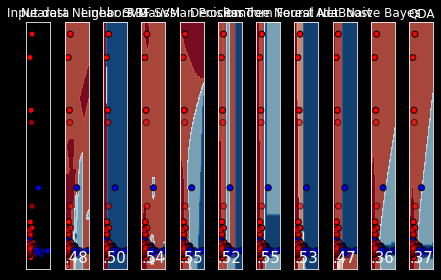

In [83]:
i=1

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

   # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i+=1





# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )
    print(x_min, x_max, y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
   
    

    ax.set_title(name)
    ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
    i += 1








plt.tight_layout()
plt.show()